In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 33)


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report, f1_score

from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV

In [2]:
#read the data in 
df= pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#get some info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#drop the id and unnamed 32 columns
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace = True)

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# reindexing columns 

column_names= ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']
df= df.reindex(columns= column_names)

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [7]:
# descriptive statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
#count class 1 (M = malignant)  and class 0 (B = benign)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

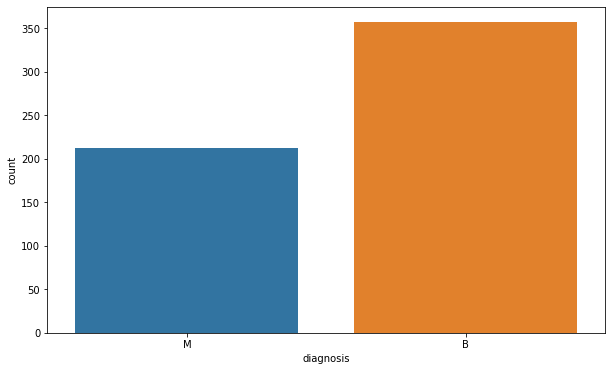

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(data= df, x= 'diagnosis');

#### Select X features and y label

In [10]:
X= df.drop('diagnosis', axis=1)

y= df['diagnosis']

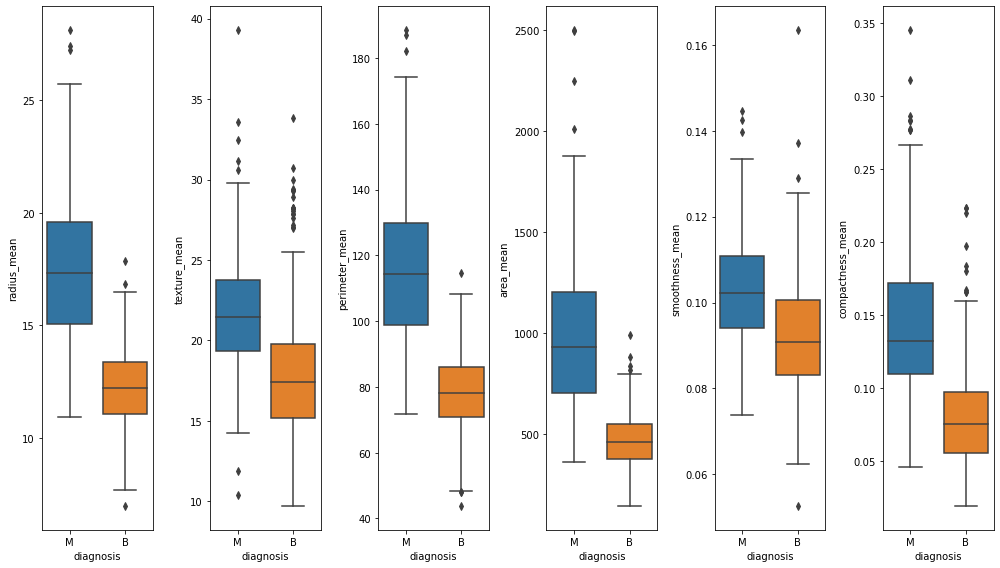

In [11]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6)= plt.subplots(1,6, figsize= (14,8))

sns.boxplot(data= df, x='diagnosis', y= 'radius_mean', ax= ax1)

sns.boxplot(data= df, x='diagnosis', y= 'texture_mean', ax= ax2)

sns.boxplot(data= df, x='diagnosis', y= 'perimeter_mean', ax= ax3)

sns.boxplot(data= df, x='diagnosis', y= 'area_mean', ax= ax4)

sns.boxplot(data= df, x='diagnosis', y= 'smoothness_mean', ax= ax5)

sns.boxplot(data= df, x='diagnosis', y= 'compactness_mean', ax= ax6)

plt.tight_layout()


<Figure size 864x576 with 0 Axes>

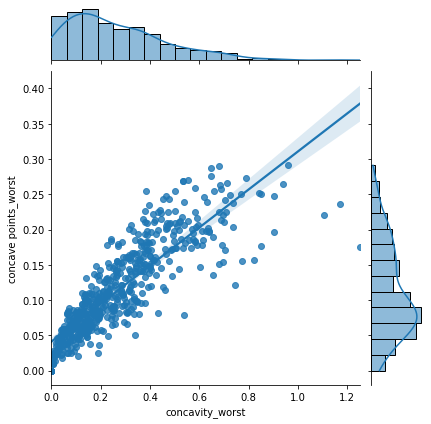

In [12]:
plt.figure(figsize= (12,8))
sns.jointplot(data = X, x= 'concavity_worst', y= 'concave points_worst', kind= 'reg');

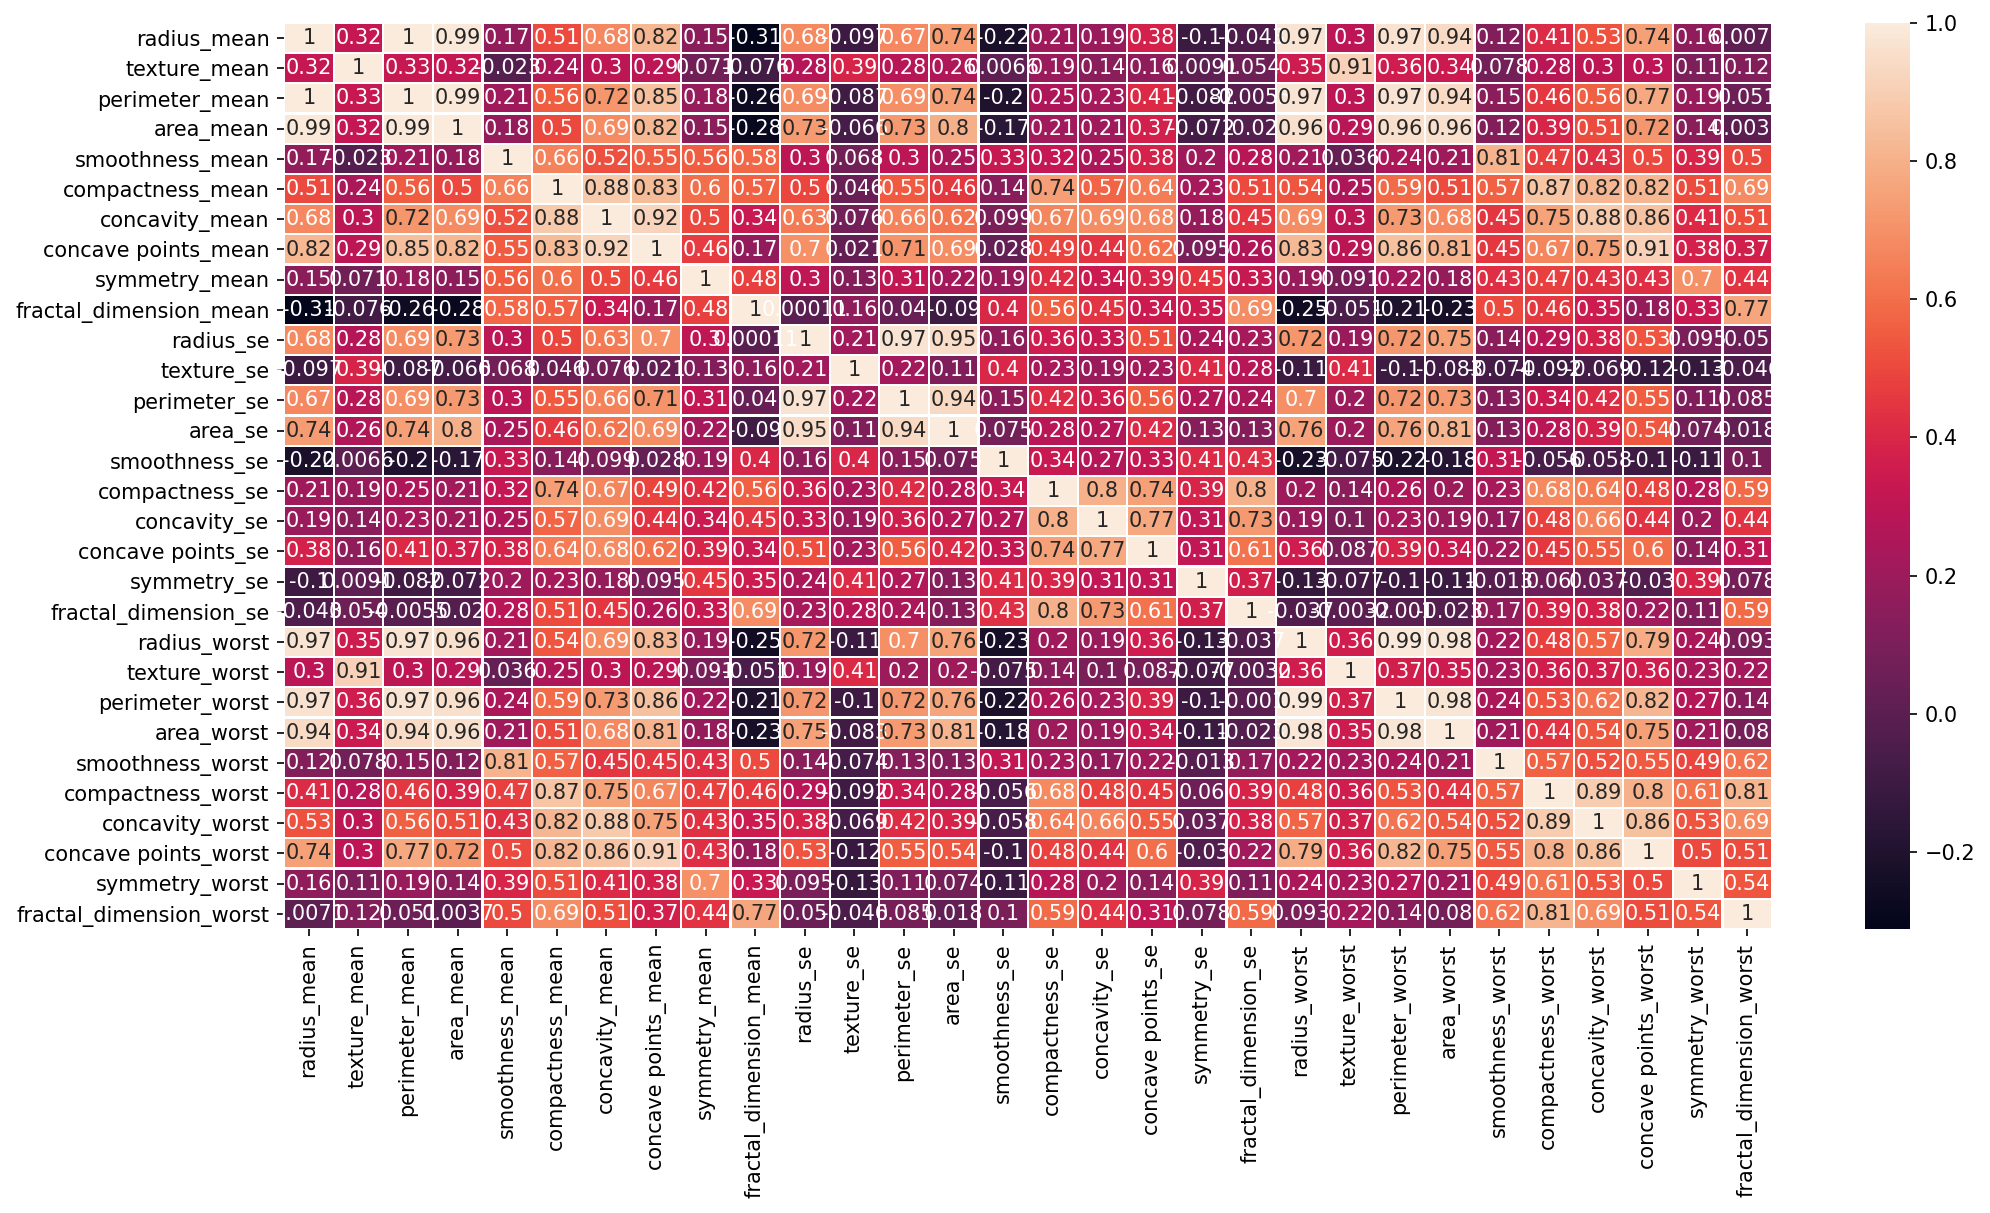

In [13]:
plt.figure(figsize= (16,8), dpi= 150)
sns.heatmap(X.corr(),linewidth= 0.5, annot= True);

### Feature Selection and Random Forest Classification

 1) Feature selection with correlation and random forest classification

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean. If you ask how i choose area_mean as a feature to use, well actually there is no correct answer, I just look at swarm plots and area_mean looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier.

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

In [14]:
drop_columns=['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se',
              'concave points_se','texture_worst','area_worst']

X_1= X.drop(drop_columns, axis= 1)

In [15]:
X_1.shape

(569, 16)

After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

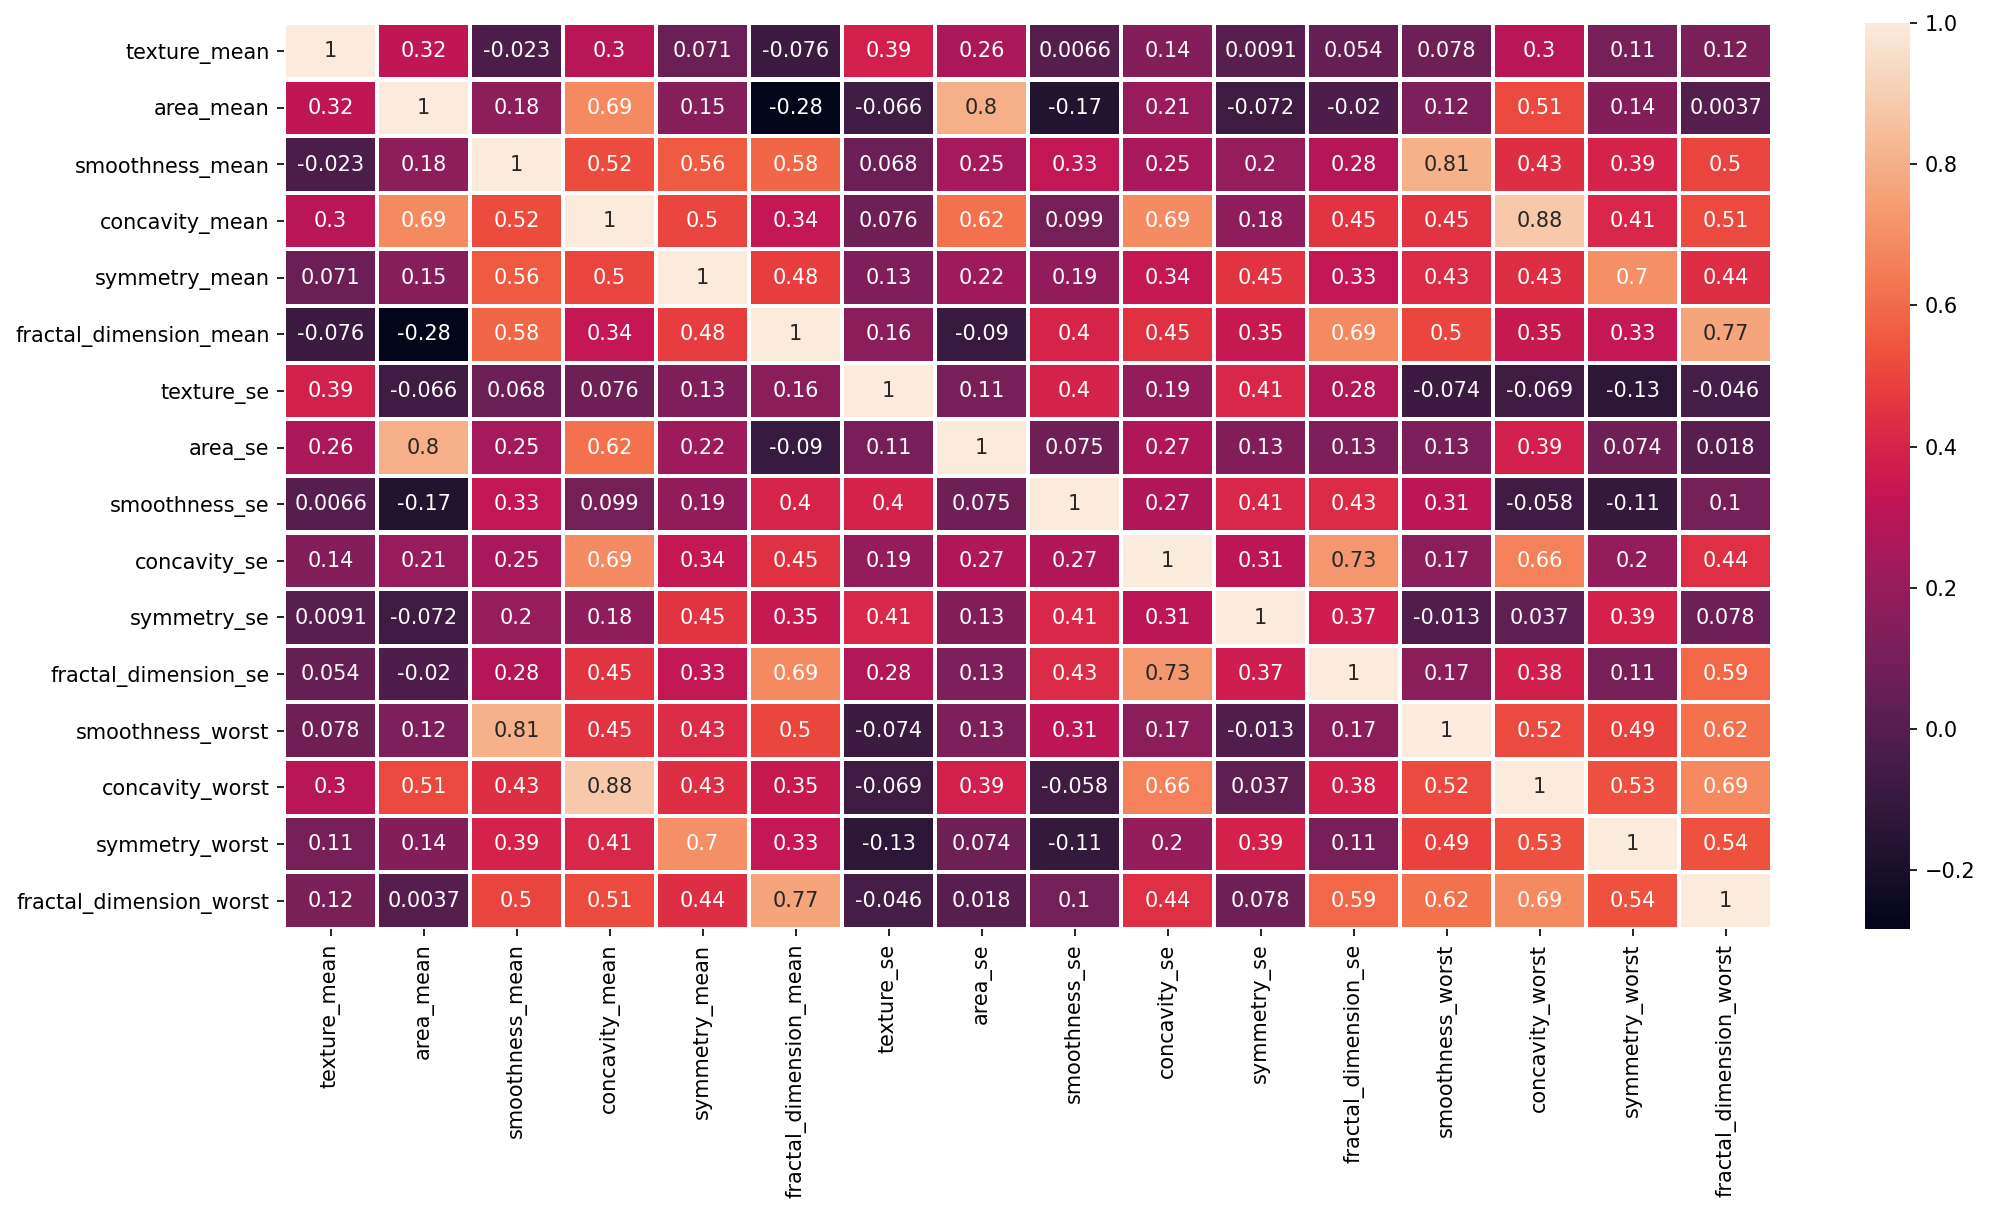

In [16]:
plt.figure(figsize= (16,8), dpi= 150)
sns.heatmap(X_1.corr(), linewidth=1.5, annot= True );

Well, we choose our features but did we choose correctly ? Lets use random forest and find accuracy according to chosen features.

In [17]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [18]:
#Random forest classifier

model= RandomForestClassifier(n_estimators= 10, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [19]:
y_pred= model.predict(X_test)

In [20]:
accuracy= accuracy_score(y_test, y_pred)

accuracy

0.9590643274853801

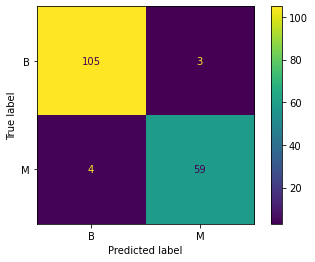

In [21]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. Now lets see other feature selection methods to find better results.

2) Univariate feature selection and random forest classification

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [22]:
selected_features= SelectKBest(chi2, k= 10).fit(X_train, y_train)

In [23]:
selected_features.scores_

array([6.06916433e+01, 3.66899557e+04, 1.00015175e-01, 1.30547650e+01,
       1.95982847e-01, 3.42575072e-04, 4.07131026e-02, 6.12741067e+03,
       1.32470372e-03, 6.92896719e-01, 1.39557806e-03, 2.65927071e-03,
       2.63226314e-01, 2.58858117e+01, 1.00635138e+00, 1.23087347e-01])

In [24]:
X_train.columns

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

Best 10 feature to classify is that area_mean, area_se, texture_mean, concavity_worst,concavity_mean etc. So lets se what happens if we use only these best scored 10 feature.

In [25]:
# transform selected features
X_train_2= selected_features.transform(X_train)
X_test_2= selected_features.transform(X_test)

In [26]:
X_train_2.shape

(398, 10)

In [27]:
X_test_2.shape

(171, 10)

In [28]:
model.fit(X_train_2, y_train)

y_pred= model.predict(X_test_2)

In [29]:
accuracy= accuracy_score(y_test, y_pred)

accuracy

0.9766081871345029

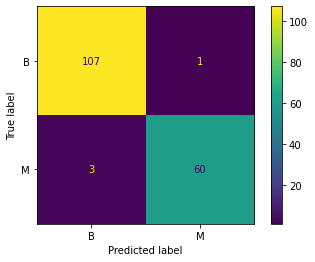

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test_2, y_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       108
           M       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Accuracy is almost 97% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 10 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.

3) Recursive feature elimination (RFE) with random forest

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 10 features. However, which 10 features will we use ? We will choose them with RFE method.

In [32]:
model= RandomForestClassifier(n_estimators=10, random_state=42)

In [33]:
rfe= RFE(estimator=model, n_features_to_select= 10, step=1)

rfe= rfe.fit(X_train, y_train)

In [34]:
# 10 best features choosen by rfe
X_train.columns[rfe.support_]

Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst'],
      dtype='object')

In [35]:
X_train_3= rfe.transform(X_train)
X_test_3= rfe.transform(X_test)

In [36]:
b.shape

NameError: name 'b' is not defined

In [ ]:
model.fit(X_train_3, y_train)

In [ ]:
y_pred= model.predict(X_test_3)

In [ ]:
accu= accuracy_score(y_test, y_pred)

accu

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test_3, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

4) Recursive feature elimination with cross validation and random forest classification
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [ ]:
# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier(n_estimators=10, random_state=42) 
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

In [ ]:
# optimal number of features
rfecv.n_features_

In [ ]:
# choosen  features
X_train.columns[rfecv.support_]

Finally, we find best 8 features that are texture_mean, area_mean, smoothness_mean, concavity_mean,
       area_se, smoothness_worst, concavity_worst,   and symmetry_worst for best classification. 

In [ ]:
X_train_4= rfecv.transform(X_train)
X_test_4= rfecv.transform(X_test)

In [ ]:
X_train_4.shape


In [ ]:
X_test_4.shape

In [ ]:
model.fit(X_train_4, y_train)

In [ ]:
y_pred= model.predict(X_test_4)

In [ ]:
accu= accuracy_score(y_test, y_pred)
accu

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test_4, y_test)

In [ ]:
print(classification_report(y_test, y_pred))

### Feature Extraction with PCA

We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.

In [37]:
#normalization
X_train_N = (X_train - X_train.mean())/(X_train.max()- X_train.min())
X_test_N = (X_test - X_test.mean())/(X_test.max()- X_test.min())

In [67]:
model= PCA(n_components= 3)

In [68]:
model.fit(X_train_N)

PCA(n_components=3)

In [69]:
# 83% of the variance is explained by the 5 components
np.sum(model.explained_variance_ratio_) 

0.7046743163209184

Text(0, 0.5, 'explained_variance_ratio_')

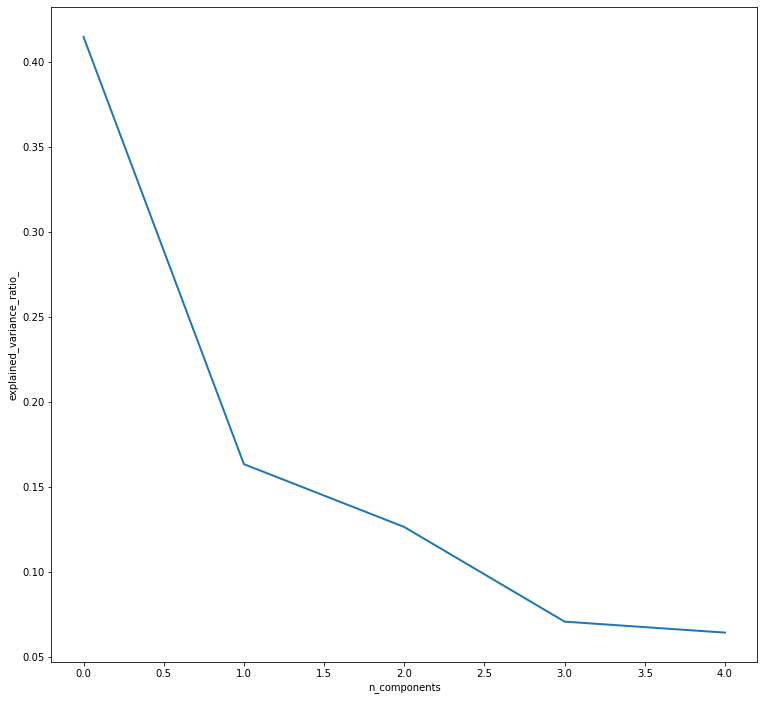

In [52]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(model.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [65]:
model= PCA(n_components= 13)

model.fit(X_train_N)

np.sum(model.explained_variance_ratio_) 

0.9933312148686708

Text(0, 0.5, 'explained_variance_ratio_')

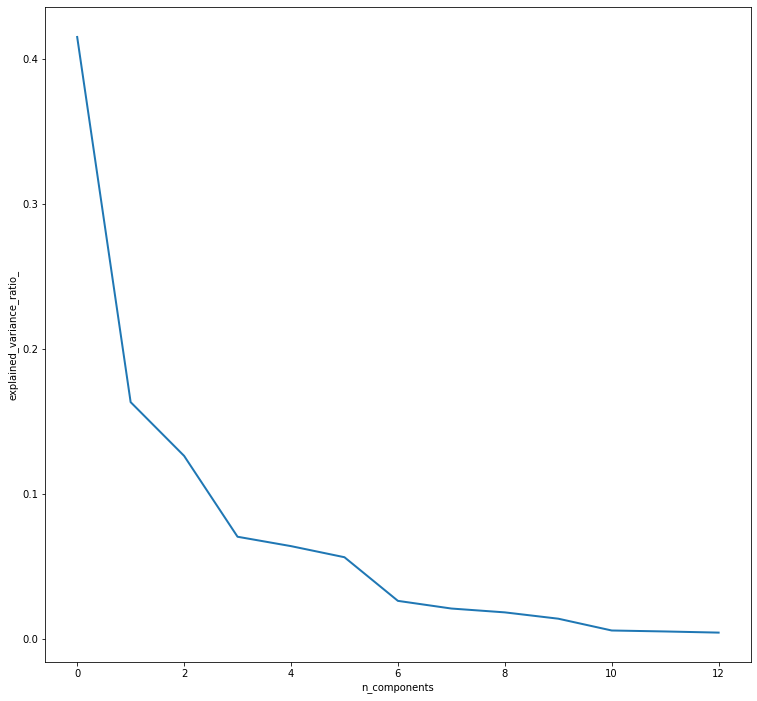

In [66]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(model.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')